In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1

In [3]:
df = pd.read_csv("mobiles_dataset.csv")

In [4]:
df.head()

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,Launched.Price.India.INR,Launched.Price.China.CNY,Launched.Price.USA.USD,Launched.Price.Dubai.AED,Launched.Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company.Name                 925 non-null    object 
 1   Model.Name                   925 non-null    object 
 2   Mobile.Weight                925 non-null    object 
 3   RAM                          925 non-null    object 
 4   Front.Camera                 925 non-null    object 
 5   Back.Camera                  925 non-null    object 
 6   Processor                    925 non-null    object 
 7   Battery.Capacity.mAh         925 non-null    int64  
 8   Screen.Size.inches           925 non-null    float64
 9   Launched.Price.Pakistan.PKR  925 non-null    int64  
 10  Launched.Price.India.INR     925 non-null    int64  
 11  Launched.Price.China.CNY     925 non-null    int64  
 12  Launched.Price.USA.USD       925 non-null    int64  
 13  Launched.Price.Dubai

In [6]:
conversion_rates = {
    "Pakistan": 0.0036,
    "India": 0.011,
    "China": 0.14,
    "USA": 1,
    "Dubai": 0.27
}

In [7]:
df["Price_Pakistan_USD"] = df["Launched.Price.Pakistan.PKR"] * conversion_rates["Pakistan"]
df["Price_India_USD"] = df["Launched.Price.India.INR"] * conversion_rates["India"]
df["Price_China_USD"] = df["Launched.Price.China.CNY"] * conversion_rates["China"]
df["Price_USA_USD"] = df["Launched.Price.USA.USD"]
df["Price_Dubai_USD"] = df["Launched.Price.Dubai.AED"] * conversion_rates["Dubai"]

In [8]:
df.head()

,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,Launched.Price.India.INR,Launched.Price.China.CNY,Launched.Price.USA.USD,Launched.Price.Dubai.AED,Launched.Year,Price_Pakistan_USD,Price_India_USD,Price_China_USD,Price_USA_USD,Price_Dubai_USD
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024,809.9964,879.989,811.86,799,755.73
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024,845.9964,934.989,853.86,849,809.73
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024,881.9964,989.989,909.86,899,863.73
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024,899.9964,989.989,867.86,899,863.73
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024,935.9964,1044.989,909.86,949,917.73


### Task 1

In [8]:
df["Avg_Launched_Price_USD"] = df[["Price_Pakistan_USD", "Price_India_USD", "Price_China_USD", "Price_USA_USD", "Price_Dubai_USD"]].mean(axis=1)

In [9]:
df["Avg_Launched_Price_USD"]

,Avg_Launched_Price_USD
0,811.31508
1,858.71508
2,908.91508
3,904.11508
4,951.51508
...,...
920,203.11508
921,270.81420
922,292.19420
923,1959.11508


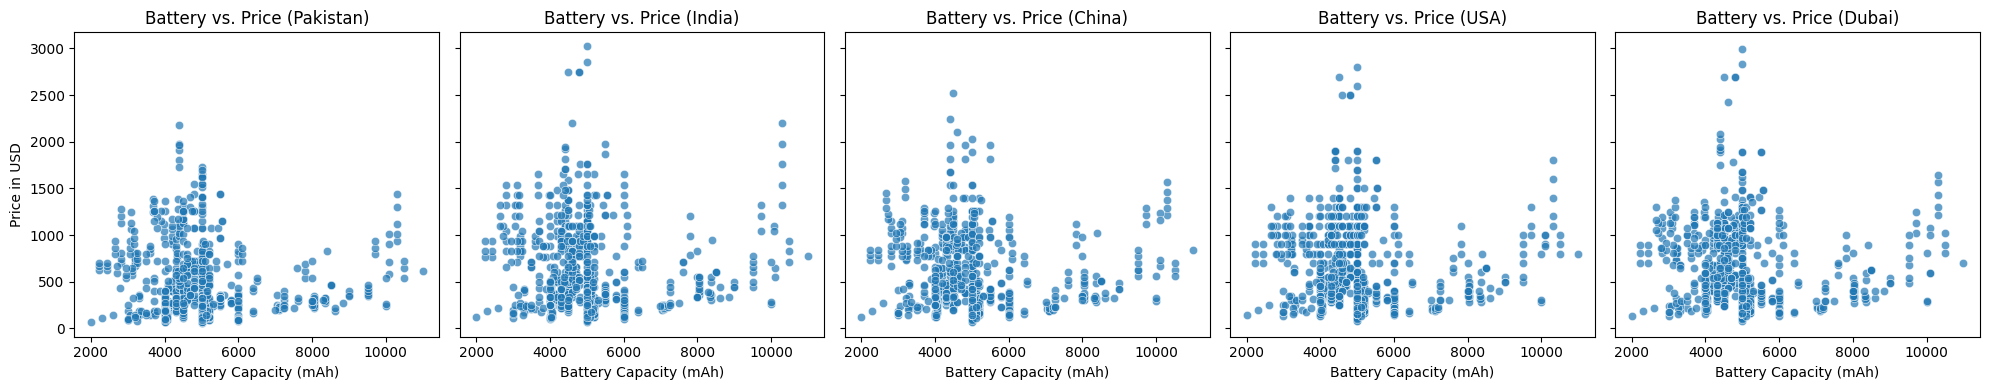

In [10]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
for i, country in enumerate(["Pakistan", "India", "China", "USA", "Dubai"]):
    col_name = f"Price_{country}_USD"
    sns.scatterplot(ax=axes[i], x=df["Battery.Capacity.mAh"], y=df[col_name], alpha=0.7)
    axes[i].set_title(f"Battery vs. Price ({country})")
    axes[i].set_xlabel("Battery Capacity (mAh)")
    axes[i].set_ylabel("Price in USD")

plt.tight_layout()
plt.show()

In [11]:
correlations = {}
for country in ["Pakistan", "India", "China", "USA", "Dubai"]:
    col_name = f"Price_{country}_USD"
    corr_value = df["Battery.Capacity.mAh"].corr(df[col_name])
    correlations[country] = round(corr_value, 2)

print("Correlation between Battery Capacity and Launched Price:")
for country, corr in correlations.items():
    print(f"{country}: {corr}")

Correlation between Battery Capacity and Launched Price:
Pakistan: -0.06
India: -0.02
China: -0.04
USA: -0.04
Dubai: -0.05


as we can see from the graph there are many smartphones that have high (also low) price but average(even less than average) battery capacity, then there are also smartphones that have higher battery capacity but lower price and we can conclude that for both small and big battery capacities the price isn't affected

also, from correlations it is clear that there is no linear relationship

### Task 2

In [13]:
df["RAM"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 925 entries, 0 to 924
Series name: RAM
Non-Null Count  Dtype 
--------------  ----- 
925 non-null    object
dtypes: object(1)
memory usage: 7.4+ KB


In [14]:
df["RAM"] = df["RAM"].astype(str).str.extract(r'(\d+)')

df["RAM"] = pd.to_numeric(df["RAM"], errors="coerce")
df["RAM"]

,RAM
0,6
1,6
2,6
3,6
4,6
...,...
920,6
921,8
922,8
923,12


In [15]:
df['RAM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 925 entries, 0 to 924
Series name: RAM
Non-Null Count  Dtype
--------------  -----
925 non-null    int64
dtypes: int64(1)
memory usage: 7.4 KB


In [16]:
df['RAM'].describe()

,RAM
count,925.00000
mean,7.76973
std,3.17593
min,1.00000
25%,6.00000
50%,8.00000
75%,8.00000
max,16.00000


In [17]:
correlations_ram = {}
for country in ["Pakistan", "India", "China", "USA", "Dubai"]:
    col_name = f"Price_{country}_USD"
    df["RAM"] = pd.to_numeric(df["RAM"])
    corr_value = df["RAM"].corr(df[col_name])
    correlations_ram[country] = round(corr_value, 2)

print("Correlation between RAM and Launched Price:")
for country, corr in correlations_ram.items():
    print(f"{country}: {corr}")

Correlation between RAM and Launched Price:
Pakistan: 0.41
India: 0.42
China: 0.42
USA: 0.46
Dubai: 0.47


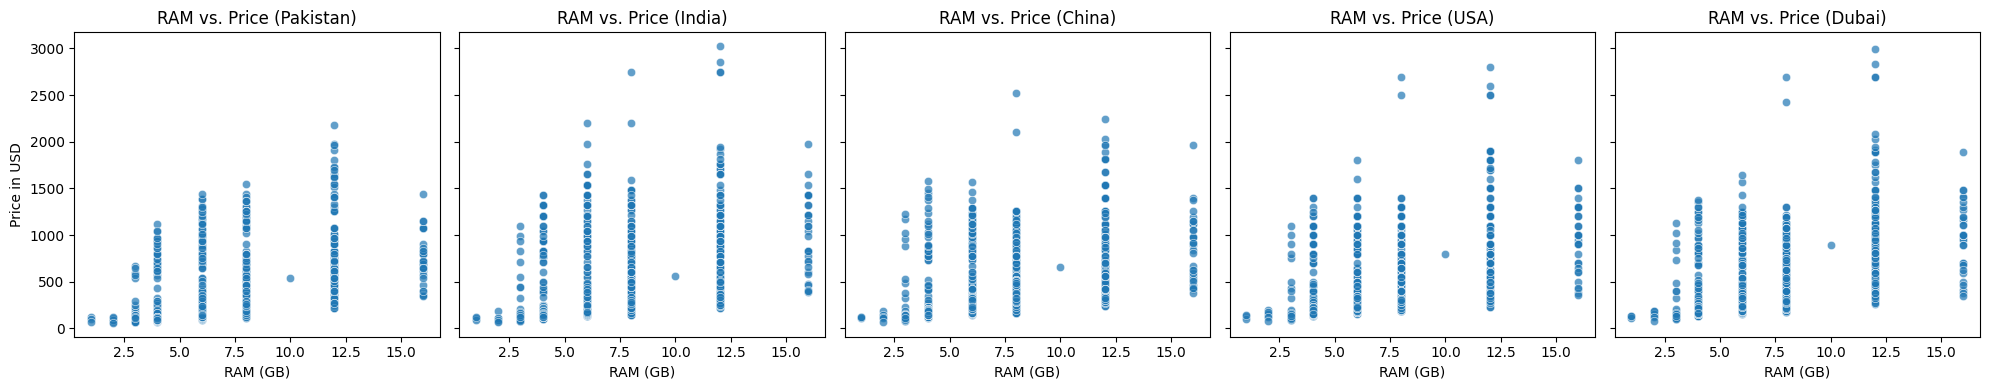

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
for i, country in enumerate(["Pakistan", "India", "China", "USA", "Dubai"]):
    col_name = f"Price_{country}_USD"
    sns.scatterplot(ax=axes[i], x=df["RAM"], y=df[col_name], alpha=0.7)
    axes[i].set_title(f"RAM vs. Price ({country})")
    axes[i].set_xlabel("RAM (GB)")
    axes[i].set_ylabel("Price in USD")

plt.tight_layout()
plt.show()

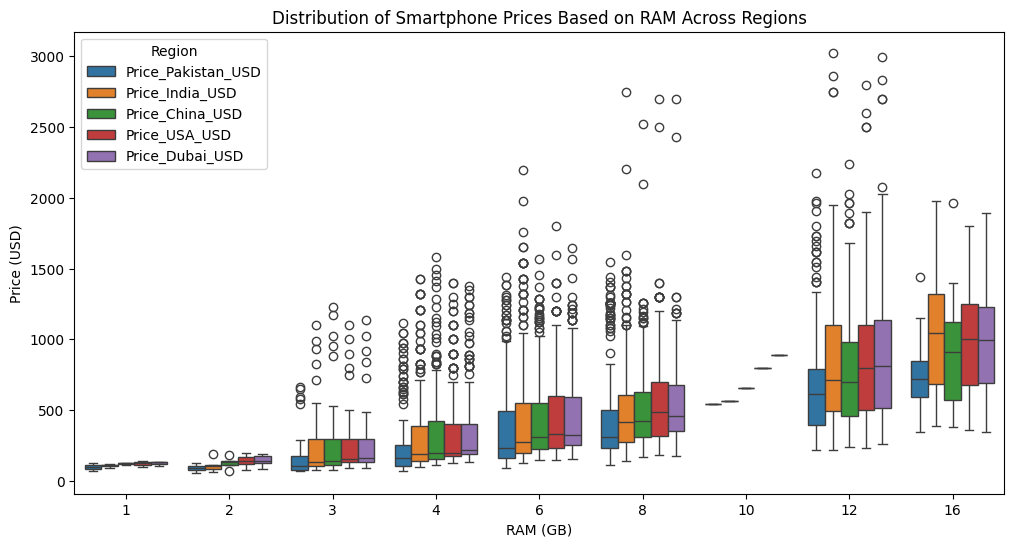

In [20]:
df_melted = df.melt(id_vars=["RAM"],
                     value_vars=["Price_Pakistan_USD", "Price_India_USD", "Price_China_USD", "Price_USA_USD", "Price_Dubai_USD"],
                     var_name="Region",
                     value_name="Price")

plt.figure(figsize=(12, 6))
sns.boxplot(x="RAM", y="Price", hue="Region", data=df_melted)
plt.xlabel("RAM (GB)")
plt.ylabel("Price (USD)")
plt.title("Distribution of Smartphone Prices Based on RAM Across Regions")
plt.legend(title="Region")
plt.show()


both from the boxplots and correlation coefficients we can see that price increases when ram gb increases, which means ram size has impact on the price,

also for price in Pakistan the price is usually lower than in other countries,

in India it is nearly the same price as the others except for 12 and 16 gb ram, which has higher price than in other countries

in China price is average, for high rams it is lower than in other countries

in USA and Dubai price is relatively the same in dollars, usually higher than in other countries

we also have outliers for 10 and 12 gb ram sizes, they have uncommonly high prices in countries like India, USA and Dubai

there are very few smartphones with 10gb ram size

### Task 3

Apple's price variation across regions (std deviation):
Price_Pakistan_USD    278.189461
Price_India_USD       324.608362
Price_China_USD       249.298702
Price_USA_USD         247.896867
Price_Dubai_USD       234.097558
dtype: float64
Highest markup for Apple is in: Price_India_USD
Average price variation (std) for other brands:
Company.Name
Google      351.305274
Honor       388.825352
Huawei      595.297700
Infinix      94.766459
Lenovo      172.840735
Motorola    264.498342
Nokia        45.206178
OnePlus     229.133975
Oppo        268.986128
POCO        104.484871
Poco         15.117943
Realme       98.848657
Samsung     515.395324
Sony        391.875802
Tecno       363.982628
Vivo        261.767728
Xiaomi      267.631268
iQOO         58.308283
dtype: float64


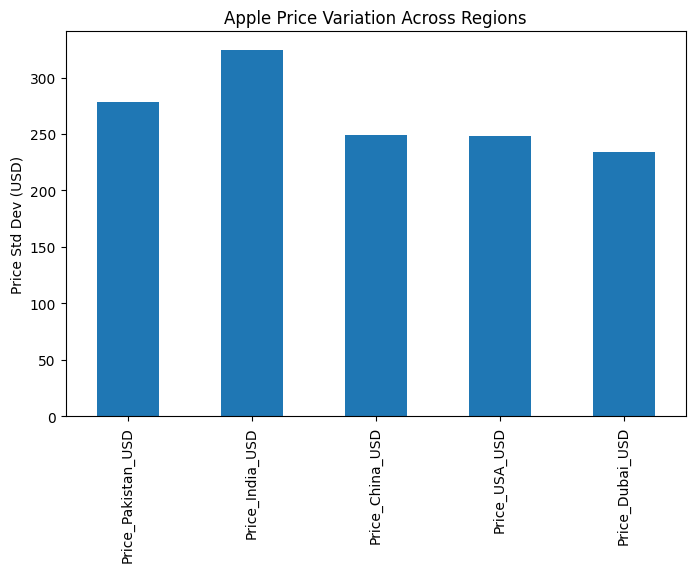

In [21]:
apple_df = df[df["Company.Name"].str.contains("Apple", case=False, na=False)]
apple_price_std = apple_df[["Price_Pakistan_USD", "Price_India_USD", "Price_China_USD", "Price_USA_USD", "Price_Dubai_USD"]].std()

other_brands_df = df[~df["Company.Name"].str.contains("Apple", case=False, na=False)]
other_brands_std = other_brands_df.groupby("Company.Name")[["Price_Pakistan_USD", "Price_India_USD", "Price_China_USD", "Price_USA_USD", "Price_Dubai_USD"]].std().mean(axis=1)

apple_avg_price = apple_df[["Price_Pakistan_USD", "Price_India_USD", "Price_China_USD", "Price_USA_USD", "Price_Dubai_USD"]].mean()
highest_markup_region = apple_avg_price.idxmax()

print(f"Apple's price variation across regions (std deviation):\n{apple_price_std}")
print(f"Highest markup for Apple is in: {highest_markup_region}")
print(f"Average price variation (std) for other brands:\n{other_brands_std}")

apple_price_std.plot(kind='bar', figsize=(8, 5), title="Apple Price Variation Across Regions", ylabel="Price Std Dev (USD)")
plt.show()


compared to itself, apple has little price difference across all countries(highest in India), but when compared to other brands, apple shows the highest price, it is mainly for premium segment buyers, while other brands are more affordable

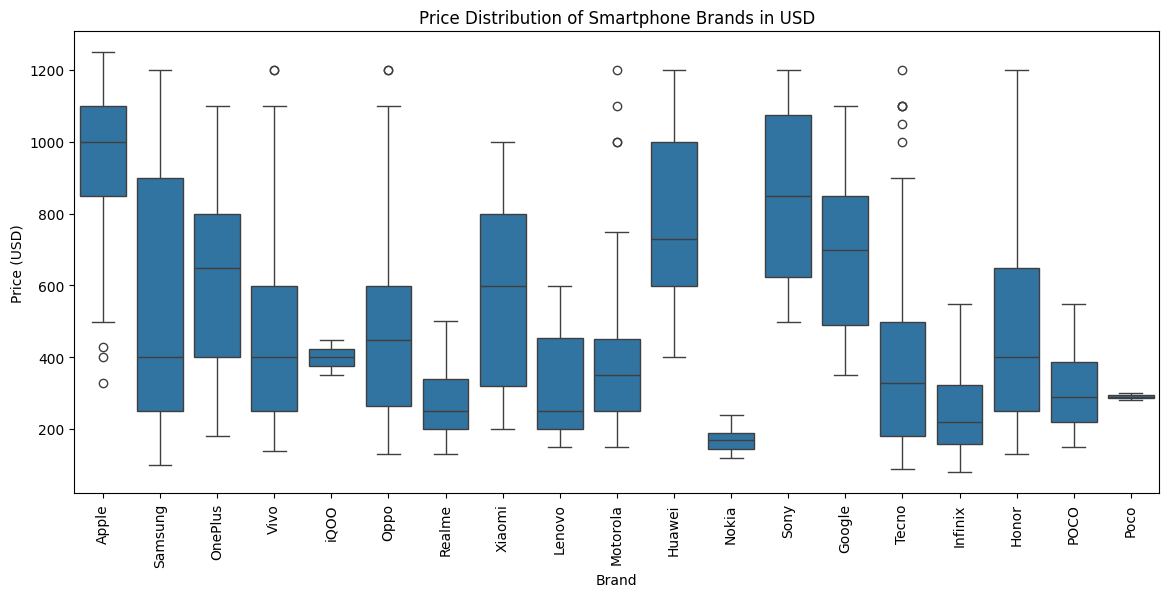

In [26]:
df_filtered = df[df['Price_USA_USD'] < df['Price_USA_USD'].quantile(0.95)]  # remove top 5% extreme values

plt.figure(figsize=(14, 6))
sns.boxplot(x="Company.Name", y='Price_USA_USD', data=df_filtered)
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Price (USD)")
plt.title(f"Price Distribution of Smartphone Brands in {'Price_USA_USD'.split('_')[-1]}")
plt.show()


<ipython-input-27-62479e03f435>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-27-62479e03f435>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-27-62479e03f435>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-27-62479e03f435>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


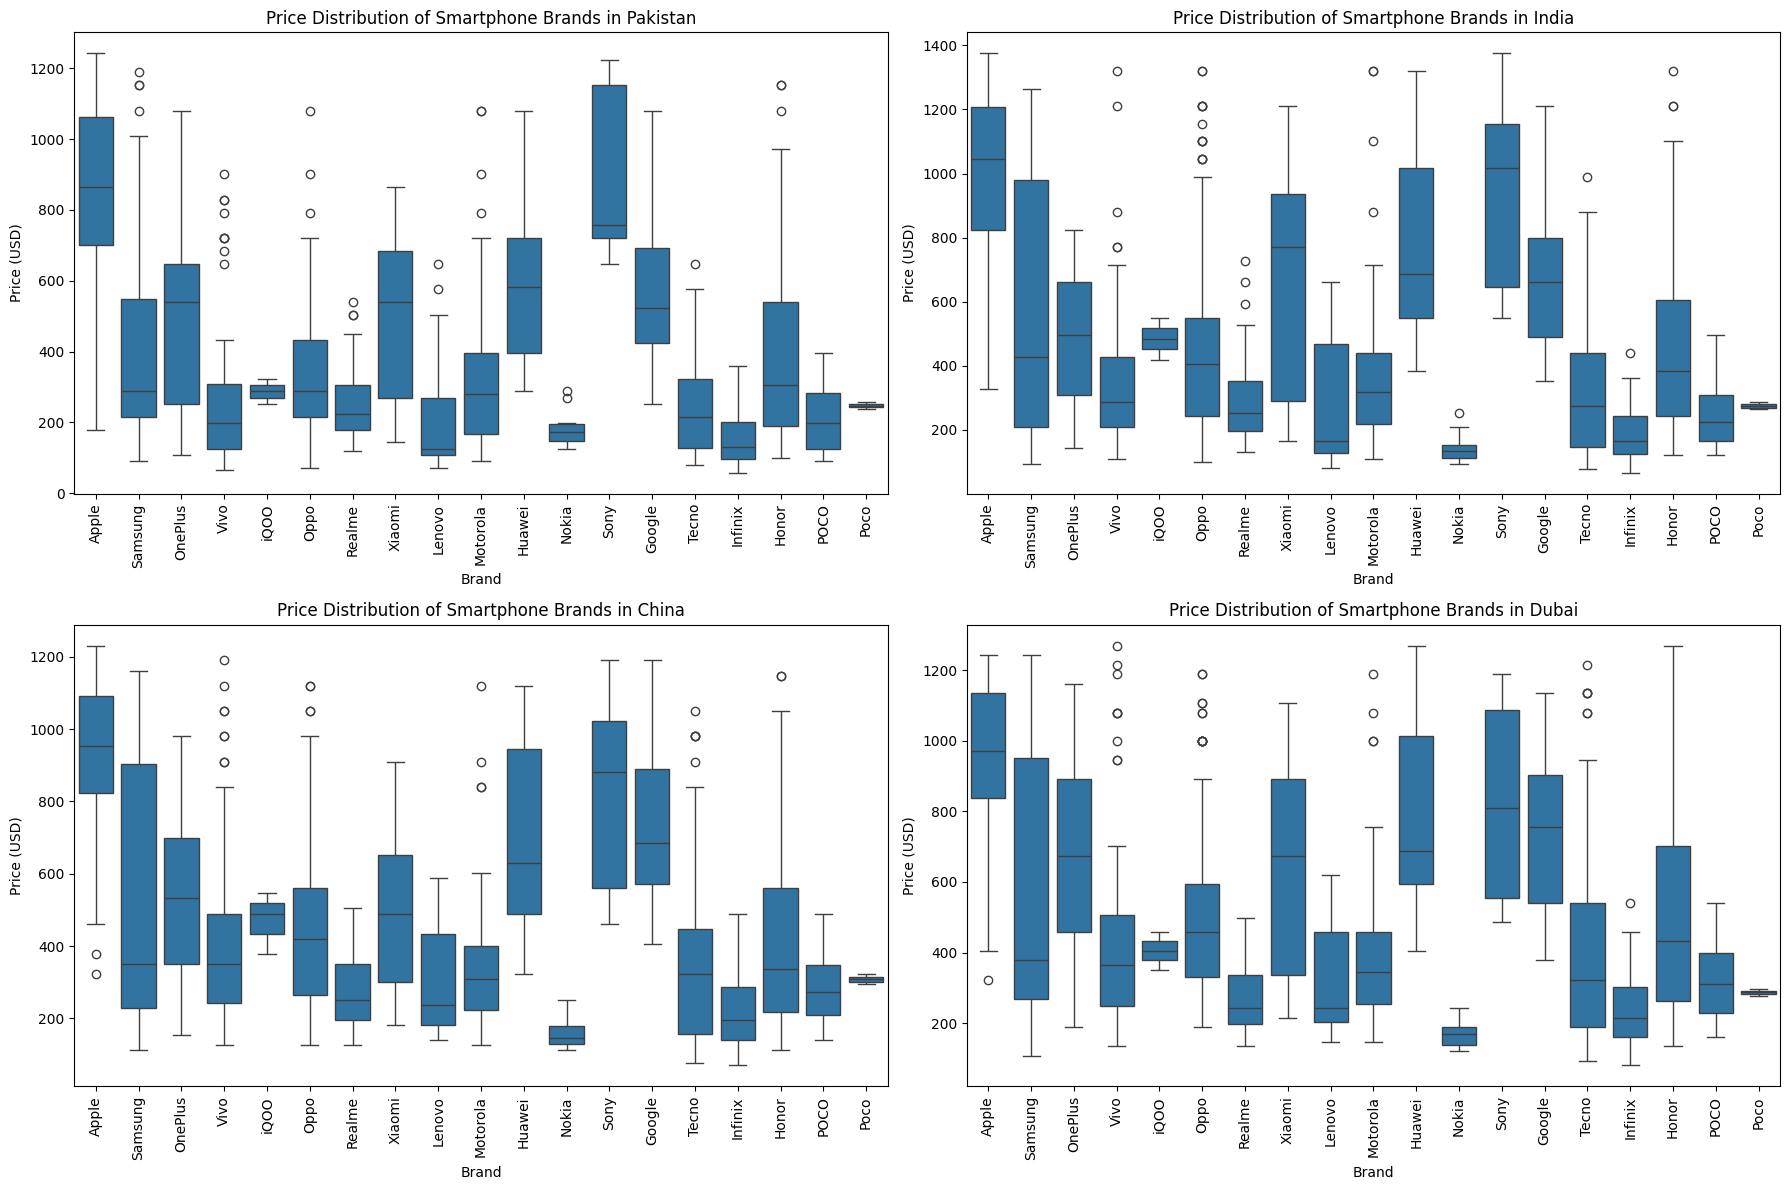

In [27]:
countries = {
    "Pakistan": "Price_Pakistan_USD",
    "India": "Price_India_USD",
    "China": "Price_China_USD",
    "Dubai": "Price_Dubai_USD"
}

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for ax, (country, price_column) in zip(axes.flatten(), countries.items()):
    df_filtered = df[df[price_column] < df[price_column].quantile(0.95)]

    sns.boxplot(x="Company.Name", y=price_column, data=df_filtered, ax=ax)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("Brand")
    ax.set_ylabel("Price (USD)")
    ax.set_title(f"Price Distribution of Smartphone Brands in {country}")

plt.tight_layout()
plt.show()


apple has highest price in India, lowest price mainly in pakistan

samsung has a relatively stable difference across all countries except for Pakistan

for other brands also, price is relatively similar, always in Pakistan mobiles have relatively lower prices than in other countries

sony also shows high price like apple

nokia, iqoo, poco show the least quantity and low prices

### Task 4

In [29]:
def classify_price(price):
    if price < 300:
        return "Budget"
    elif 300 <= price <= 700:
        return "Mid-Range"
    else:
        return "Premium"

In [30]:
df["Price_Category"] = df["Price_USA_USD"].apply(classify_price)
brand_price_distribution = df.groupby(["Company.Name", "Price_Category"])["Model.Name"].count().unstack().fillna(0)

In [32]:
brand_price_distribution["Covers_All_Segments"] = brand_price_distribution.apply(lambda x: all(x > 0), axis=1)
brand_price_distribution

Price_Category,Budget,Mid-Range,Premium,Covers_All_Segments
Company.Name,,,,
Apple,0.0,8.0,89.0,False
Google,0.0,12.0,9.0,False
Honor,29.0,37.0,25.0,True
Huawei,0.0,15.0,27.0,False
Infinix,41.0,15.0,0.0,False
Lenovo,10.0,5.0,0.0,False
Motorola,22.0,33.0,7.0,True
Nokia,10.0,0.0,0.0,False
OnePlus,10.0,23.0,20.0,True


as we can see, for example apple has no budget models, 8 mid segment models and 89 premium models, while nokia has only models of budget segment

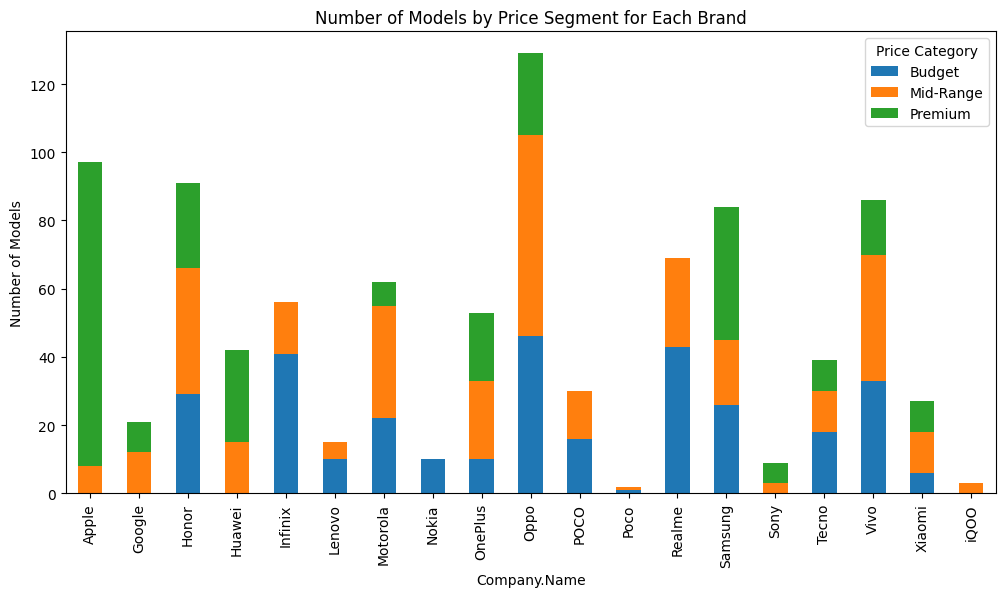

In [33]:
brand_price_distribution.drop(columns=["Covers_All_Segments"]).plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Number of Models by Price Segment for Each Brand")
plt.ylabel("Number of Models")
plt.legend(title="Price Category")
plt.show()

brands, such as apple, google, sony and huawei have only mid segment or premium models,

while huawei, lenovo, motorola, nokia, poco(i am not sure whether i needed to mix POCO and poco or not, so i left them as they were, assuming maybe it's a branch of POCO), realme, iqoo cover mainly budget or mid segment

brands like honor, oppo, samsung, tecno, vivo and xiaomi cover nearly equally all segments

### Task 5

Average smartphone price per region:
Price_Pakistan_USD    449.934239
Price_India_USD       552.823682
Price_China_USD       530.741362
Price_USA_USD         579.623784
Price_Dubai_USD       586.029016
dtype: float64
Most affordable region: Price_Pakistan_USD
Brands with the highest price differences across regions:
Company.Name
Huawei     470.059143
Sony       344.803067
Apple      241.524260
Google     227.958838
Vivo       208.803600
iQOO       195.992600
Oppo       194.218716
Tecno      190.325908
OnePlus    177.695728
Honor      174.942062
dtype: float64


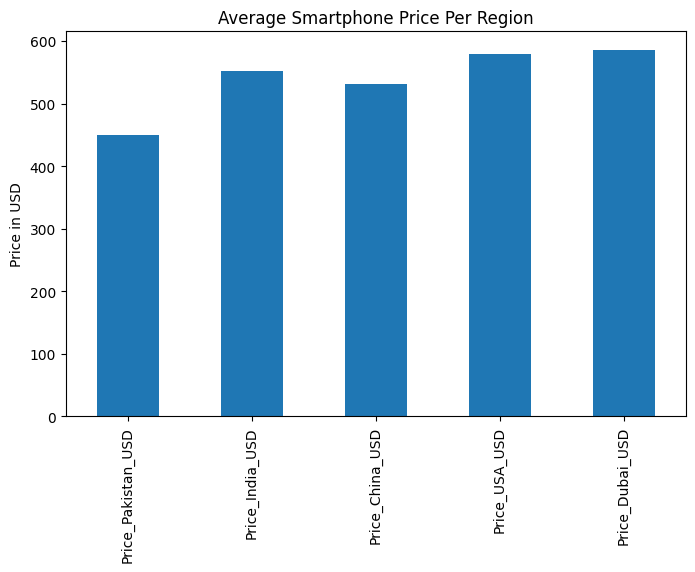

In [34]:
avg_price_per_region = df[["Price_Pakistan_USD", "Price_India_USD", "Price_China_USD", "Price_USA_USD", "Price_Dubai_USD"]].mean()
cheapest_region = avg_price_per_region.idxmin()

brand_avg_prices = df.groupby("Company.Name")[["Price_Pakistan_USD", "Price_India_USD", "Price_China_USD", "Price_USA_USD", "Price_Dubai_USD"]].mean()
brand_price_diff = brand_avg_prices.max(axis=1) - brand_avg_prices.min(axis=1)

print(f"Average smartphone price per region:\n{avg_price_per_region}")
print(f"Most affordable region: {cheapest_region}")
print(f"Brands with the highest price differences across regions:\n{brand_price_diff.sort_values(ascending=False).head(10)}")

avg_price_per_region.plot(kind='bar', figsize=(8, 5), title="Average Smartphone Price Per Region", ylabel="Price in USD")
plt.show()

as we can see average lowest price is in Pakistan, other countries have relatively similar average prices, USA and Dubai have high prices

most variance across all countries prices' have huawei, sony, apple, etc.

In [38]:
price_columns = ["Price_Pakistan_USD", "Price_India_USD", "Price_China_USD", "Price_USA_USD", "Price_Dubai_USD"]
brand_avg_price = df.groupby("Company.Name")[price_columns].mean().mean(axis=1).sort_values(ascending=False)

brand_avg_price_df = brand_avg_price.reset_index()
brand_avg_price_df.columns = ["Brand", "Average Price (USD)"]

<ipython-input-39-0130a280dfc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Brand", y="Average Price (USD)", data=brand_avg_price_df, palette="viridis")


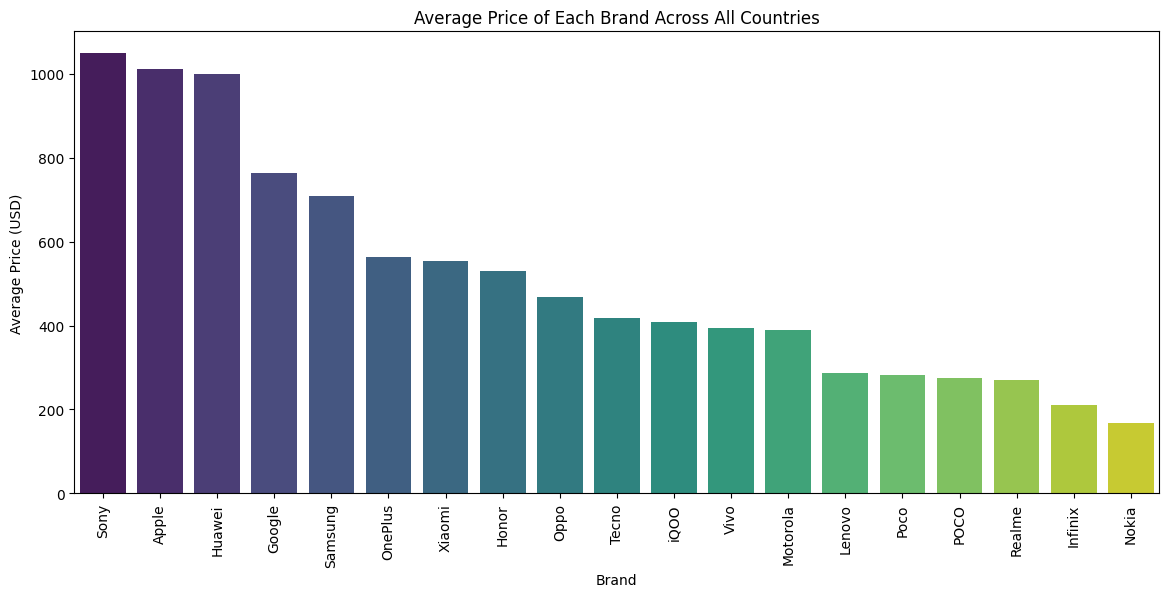

In [39]:
plt.figure(figsize=(14, 6))
sns.barplot(x="Brand", y="Average Price (USD)", data=brand_avg_price_df, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Average Price (USD)")
plt.title("Average Price of Each Brand Across All Countries")
plt.show()

In [40]:
print("Top 10 Most Expensive Brands (on average):")
print(brand_avg_price_df.head(10))

print("\nTop 10 Most Affordable Brands (on average):")
print(brand_avg_price_df.tail(10))

Top 10 Most Expensive Brands (on average):
     Brand  Average Price (USD)
0     Sony          1048.915080
1    Apple          1010.581577
2   Huawei           998.977314
3   Google           762.819842
4  Samsung           709.255526
5  OnePlus           562.605673
6   Xiaomi           553.752117
7    Honor           531.002113
8     Oppo           468.274520
9    Tecno           418.312003

Top 10 Most Affordable Brands (on average):
       Brand  Average Price (USD)
9      Tecno           418.312003
10      iQOO           409.381747
11      Vivo           393.353031
12  Motorola           389.068403
13    Lenovo           285.818693
14      Poco           281.504200
15      POCO           275.695080
16    Realme           270.696434
17   Infinix           211.629009
18     Nokia           168.141080


In [41]:
countries = {
    "Pakistan": "Price_Pakistan_USD",
    "India": "Price_India_USD",
    "China": "Price_China_USD",
    "USA": "Price_USA_USD",
    "Dubai": "Price_Dubai_USD"
}

<ipython-input-42-74c6695189e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Company.Name", y=price_column, data=brand_avg_price, ax=ax, palette="viridis")
<ipython-input-42-74c6695189e8>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-42-74c6695189e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Company.Name", y=price_column, data=brand_avg_price, ax=ax, palette="viridis")
<ipython-input-42-74c6695189e8>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixe

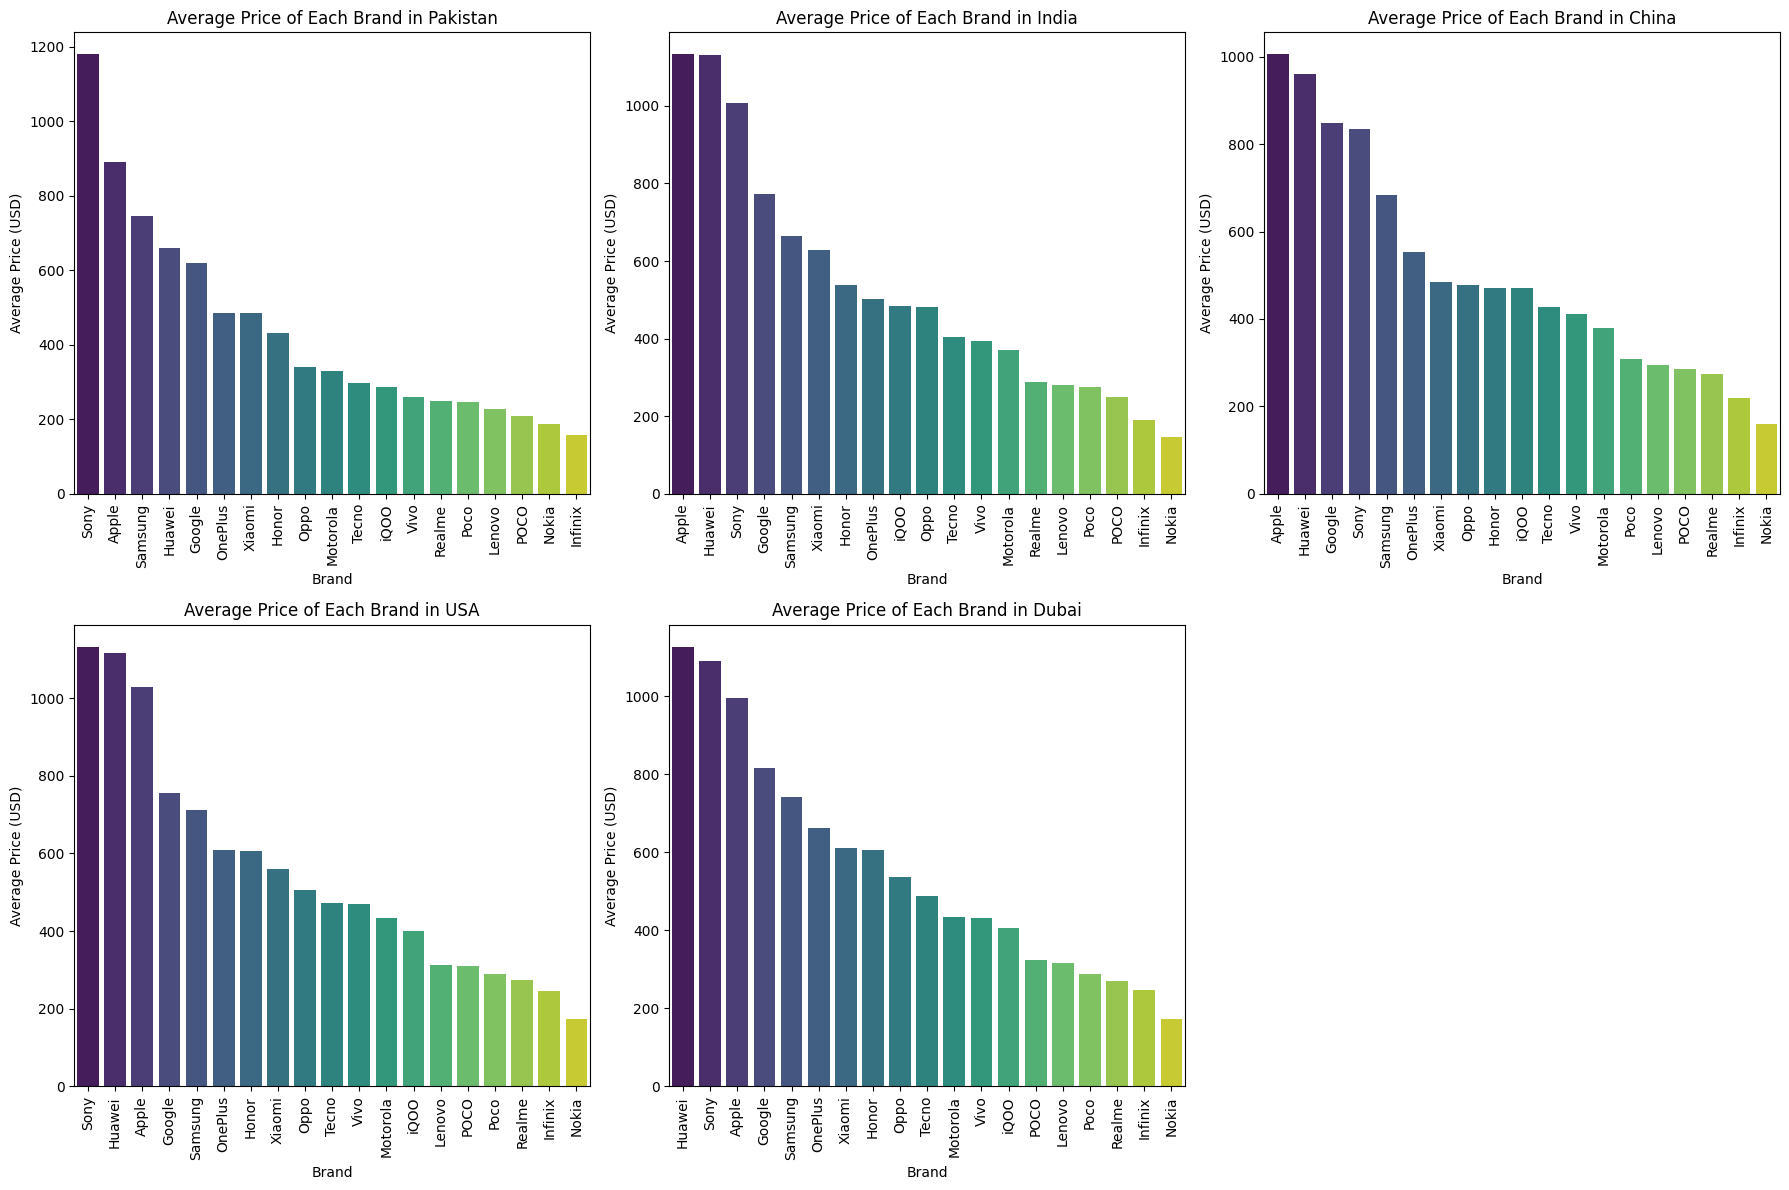

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for ax, (country, price_column) in zip(axes.flatten(), countries.items()):
    brand_avg_price = df.groupby("Company.Name")[price_column].mean().sort_values(ascending=False).reset_index()

    sns.barplot(x="Company.Name", y=price_column, data=brand_avg_price, ax=ax, palette="viridis")

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("Brand")
    ax.set_ylabel("Average Price (USD)")
    ax.set_title(f"Average Price of Each Brand in {country}")

for i in range(len(countries), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

overall, in Pakistan we see the lowest prices

in India,USA and Dubai huawei has price >1000, in China it's a bit lower than 1000 and in Pakistan the price is between 600 and 800

we can also see similar differences for sony, apple, google and other brands mentioned above

# Part 2

### Task 1

In [43]:
avg_price_df = avg_price_per_region.reset_index()
avg_price_df.columns = ["Region", "Average Price (USD)"]

<ipython-input-44-474de185be47>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Average Price (USD)", data=avg_price_df, palette="Blues_r")


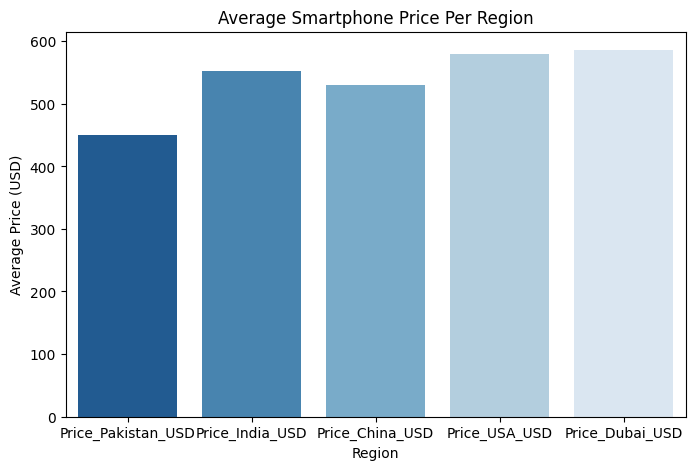

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Region", y="Average Price (USD)", data=avg_price_df, palette="Blues_r")
plt.xlabel("Region")
plt.ylabel("Average Price (USD)")
plt.title("Average Smartphone Price Per Region")
plt.show()

### Task 2

In [45]:
brand_counts = df["Company.Name"].value_counts()

In [47]:
top_brands = brand_counts[:10]
other_brands = pd.Series([brand_counts[10:].sum()], index=["Other"])
market_share = pd.concat([top_brands, other_brands])

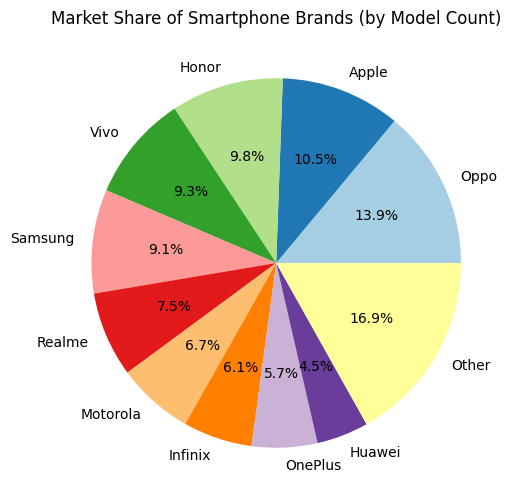

In [51]:
plt.figure(figsize=(10, 6))
plt.pie(market_share, labels=market_share.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Market Share of Smartphone Brands (by Model Count)")
plt.show()

# Part 4

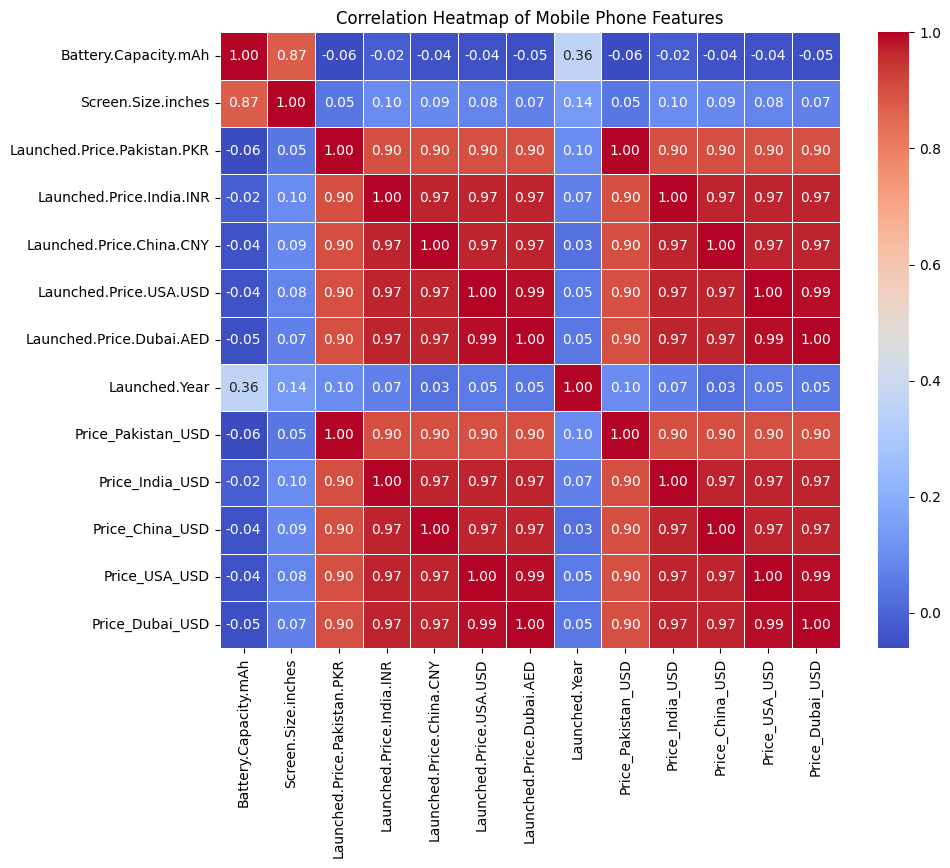

In [11]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Mobile Phone Features')
plt.show()


correlation with these numerical features won't give any useful insights

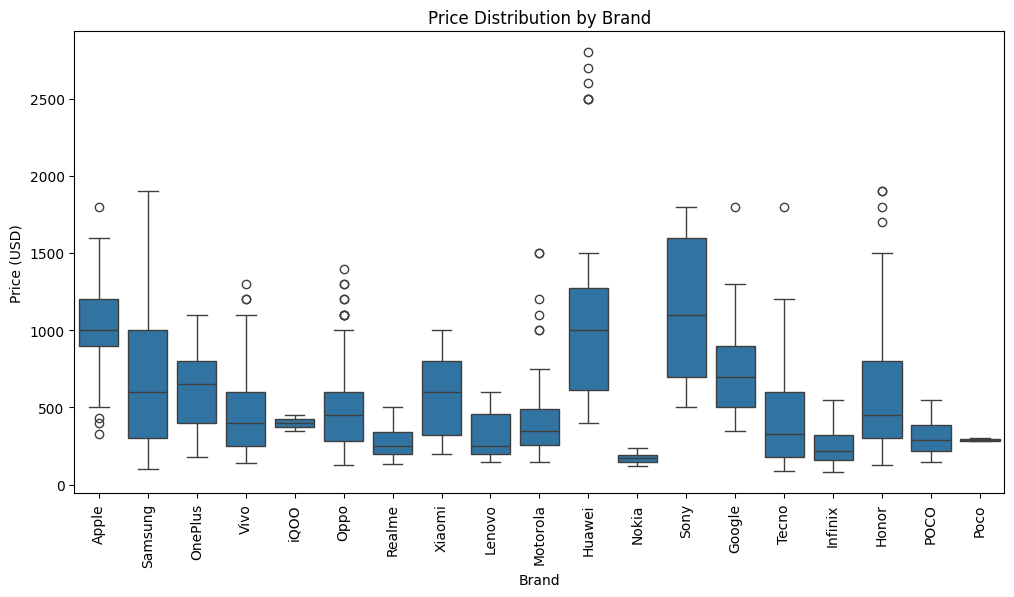

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company.Name', y='Price_USA_USD', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (USD)')
plt.show()


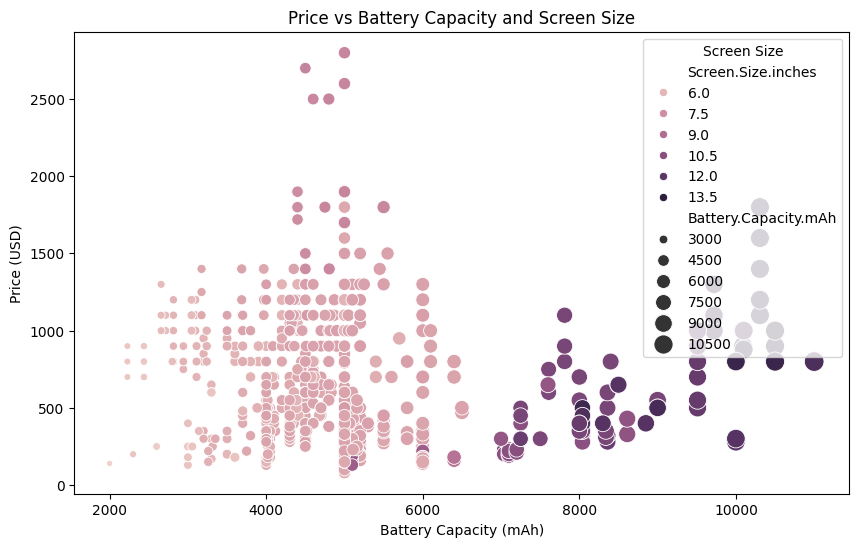

In [17]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Battery.Capacity.mAh', y='Price_USA_USD', hue='Screen.Size.inches', size='Battery.Capacity.mAh', data=df, sizes=(20, 200))

plt.title('Price vs Battery Capacity and Screen Size')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price (USD)')
plt.legend(title='Screen Size')
plt.show()


as we can see, the darker the points are, the more battery capacity we have

there are a few outliers that show small screen and battery size but have high prices

mainly prices are between ~400-1500 usd, both for small and big battery and screen sizes, so we can conclude from the graph that high combination of both leads to high price

<ipython-input-25-fcef9e7f5070>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Front.Camera', y='Price_USA_USD', data=avg_price_front_camera, palette='viridis')


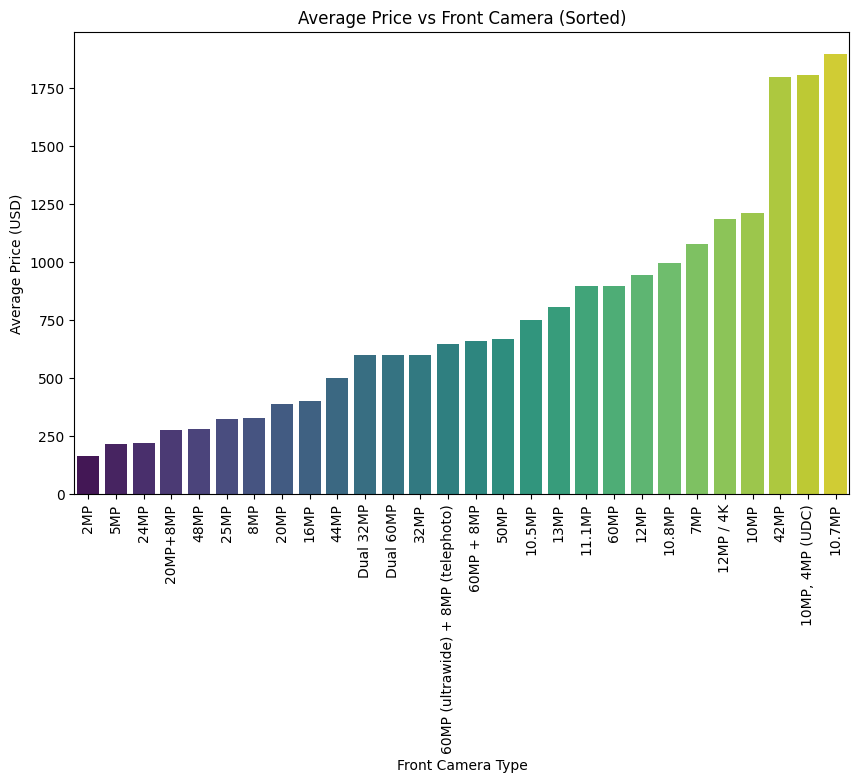

In [25]:
avg_price_front_camera = df.groupby('Front.Camera')['Price_USA_USD'].mean().reset_index()
avg_price_front_camera = avg_price_front_camera.sort_values(by='Price_USA_USD', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Front.Camera', y='Price_USA_USD', data=avg_price_front_camera, palette='viridis')
plt.title('Average Price vs Front Camera (Sorted)')
plt.xlabel('Front Camera Type')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=90)
plt.show()


besides the brands, other factors can also influence the price, but as we can see from average price vs front camera type, there are smartphones that have 48-60mp camera quality, but are cheaper than smartphones that have 10-12mp front camera, so this doesn't have that much impact

<ipython-input-27-c4aaa3358190>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Back.Camera', y='Price_USA_USD', data=avg_price_back_camera, palette='viridis')


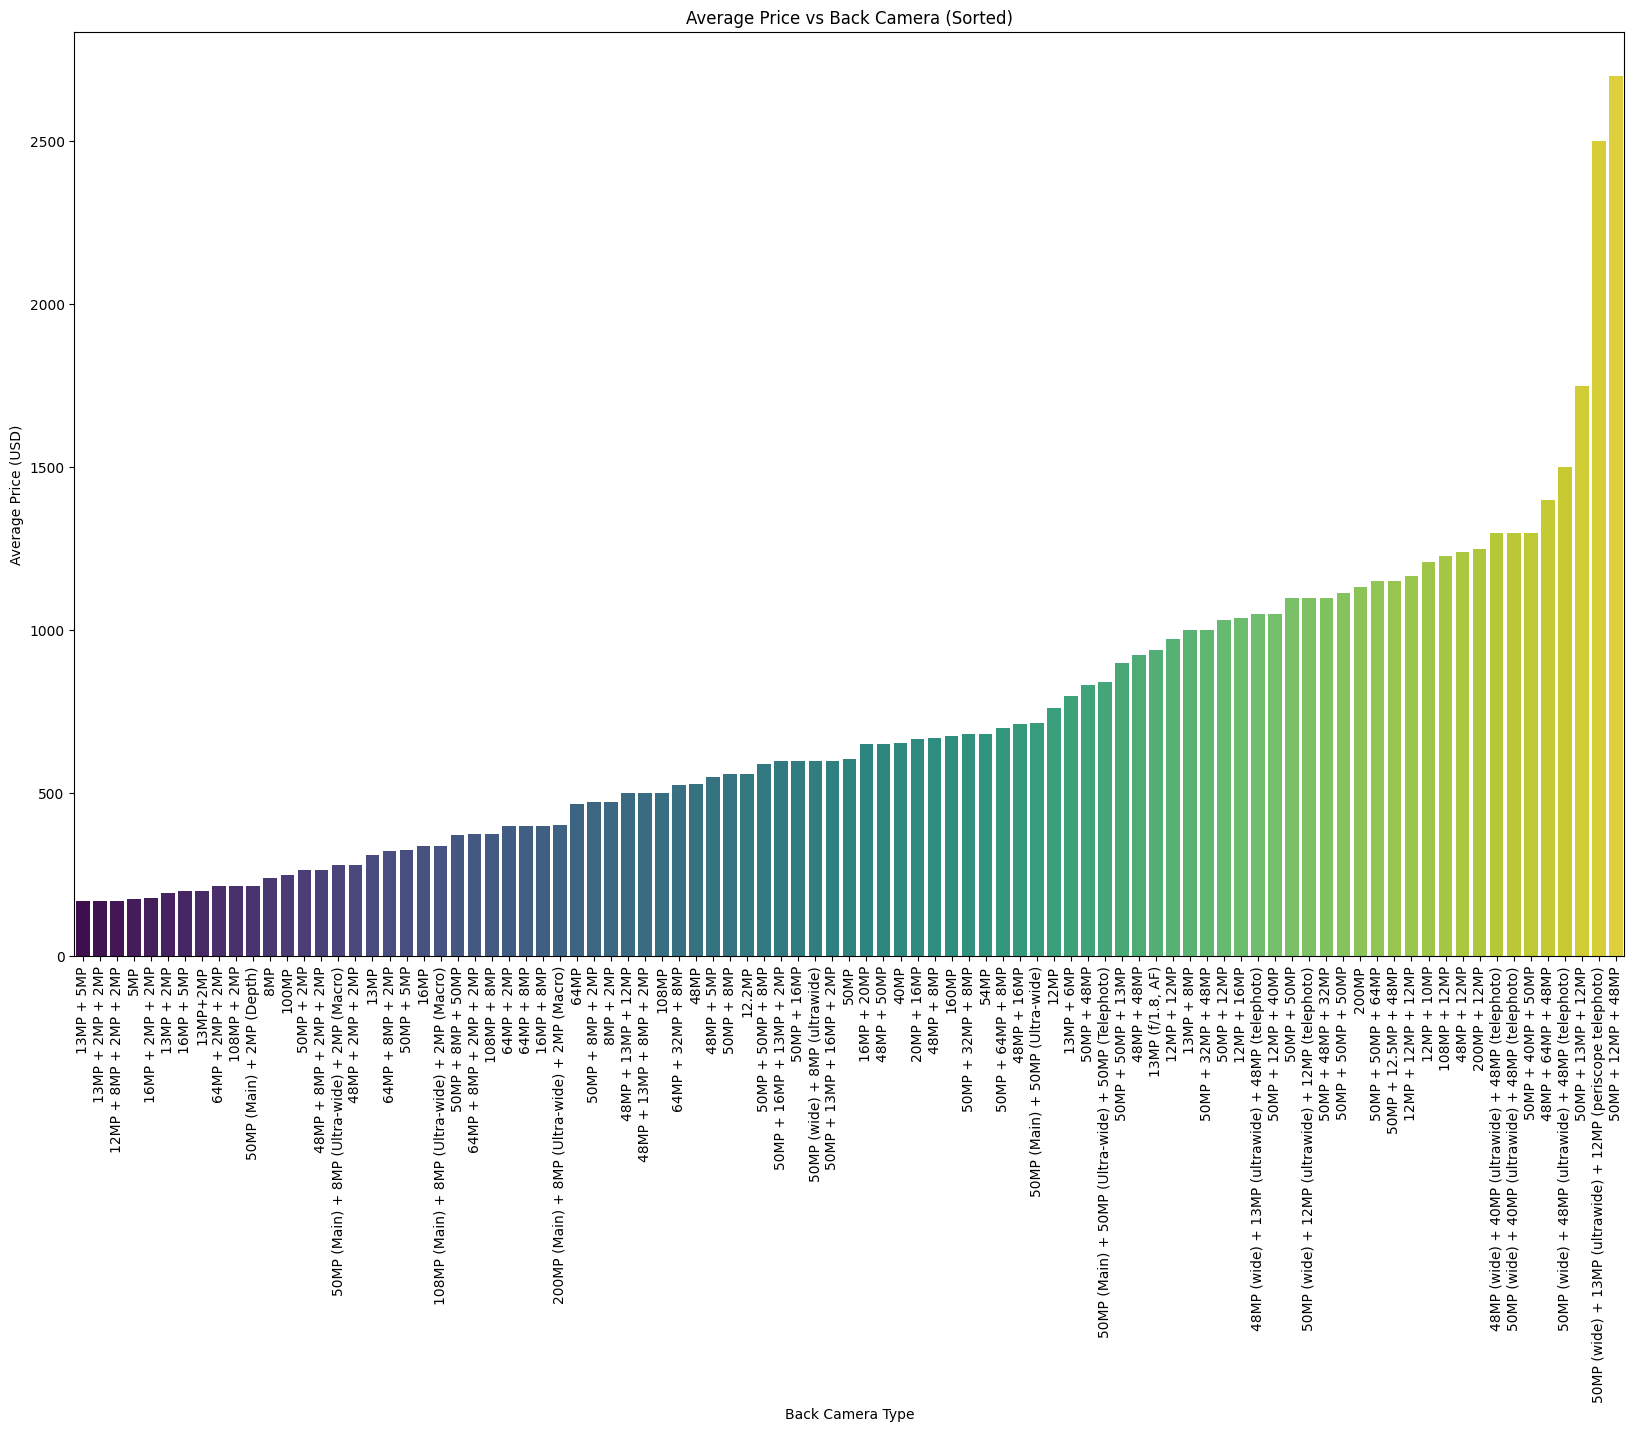

In [27]:
avg_price_back_camera = df.groupby('Back.Camera')['Price_USA_USD'].mean().reset_index()
avg_price_back_camera = avg_price_back_camera.sort_values(by='Price_USA_USD', ascending=True)

plt.figure(figsize=(20, 12))
sns.barplot(x='Back.Camera', y='Price_USA_USD', data=avg_price_back_camera, palette='viridis')
plt.title('Average Price vs Back Camera (Sorted)')
plt.xlabel('Back Camera Type')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=90)
plt.show()


here we have a bit different picture

smartphones that have higher back camera quality, usually have higher price, as we can see from the graph, until 40-50mp basic back camera, prices are more affordable, and when it comes to triple cameras, which have 50-200mp quality, the prices have higher range, so we can conclude that back camera has some influence on prices

<ipython-input-29-cd713a11fddf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Launched.Year', y='Price_USA_USD', data=df, palette='Set2')


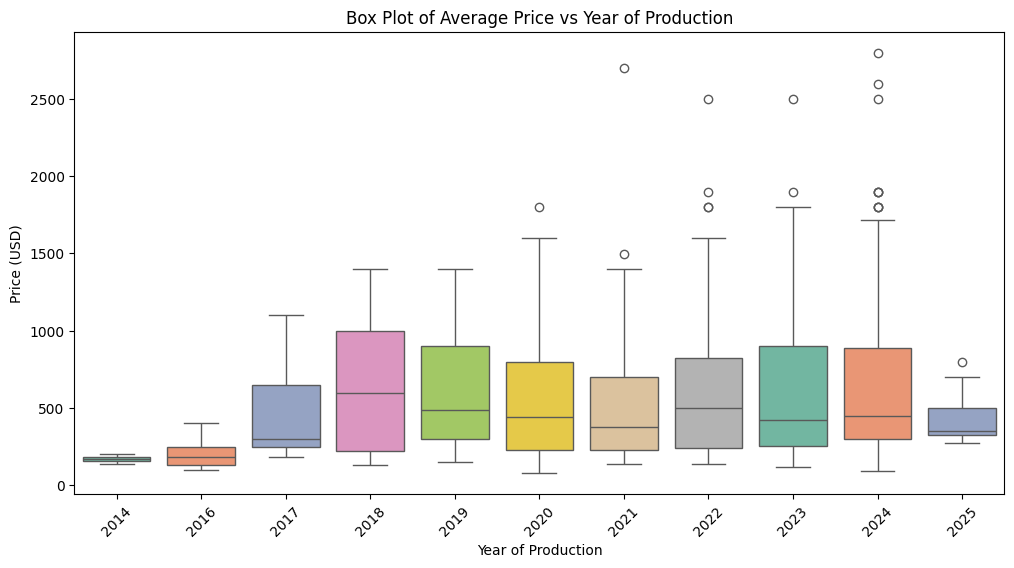

In [29]:
avg_price_year = df.groupby('Launched.Year')['Price_USA_USD'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Launched.Year', y='Price_USA_USD', data=df, palette='Set2')
plt.title('Box Plot of Average Price vs Year of Production')
plt.xlabel('Year of Production')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()


not a very clear pattern, because in 2018, 2019 we have relatively higher(or similar) prices than in 2022-2024, here we have high prices, which is understandable, because freshly-released mobiles have higher prices

2014-2017 prices are low, which is reasonable

and in 2025 we can assume that we don't have that many models so the price for now is low(maybe budget models were released so far)